# matplotlibを使ったデータのグラフ表示（１０月２９日）
![matplotlib](https://upload.wikimedia.org/wikipedia/en/thumb/5/56/Matplotlib_logo.svg/640px-Matplotlib_logo.svg.png)

<!-- 本ページのnotebookは [こちら](notebooks.rst#matplotlib) からダウンロードしてColabにアップロードしてください。 -->

下のアイコンをクリック。

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ymatumot/GSC/blob/main/matplotlib.ipynb)

データサイエンスでは、データの取得、解析、可視化が重要な要素を占める。前回のNumPyでは大量のデータを一括して処理するための拡張ライブラリの使い方を勉強した。今回は、これら大量のデータを処理して視覚的に理解するための可視化ライブラリでデファクトスタンダードになっている、**matplotlib**の使い方位について説明する。

matplotlibの可視化ツールへのアクセス方法は大きく分けて２つ存在する。

1. **pyplot**モジュールを使う。とりあえず可視化するのを目的として、pyplot経由のコマンドで簡単にデータを図示することができる。pyplotは商用ソフトであるMATLABを意識して作られた関数で構成されており、MATLABの利用経験がある人は同じようなコマンドと引数で利用することができるので、馴染みやすい。
2. より詳細なカスバマイズを行うには、各オブジェクト（描画領域、軸など）に用意されているメソッドを使う。

本講義では1のpyplotによる図示方法を中心に学ぶ。pyplotを経由した可視化方法は多岐にわたり、その全てを講義中に紹介することはできない。その他の機能については https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html を参照すること。

全ての情報は本家サイト https://matplotlib.org/ を参照のこと。

## まずは始めよう
pyplotのplotメソッド`pyplot.plot()`で線プロットを表示する方法を例に、段階的に図を装飾していく。`pyplot.plot()`の詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html を参照のこと。

描画結果を表示させるには、`show()`メソッドを実行する。jupyter notebookの場合は`plt.show()`としなくても、セルの内容を実行すれば（Shift+Retrunキーを押せば）、描画内容がセルの下に表示される。

（Tips：linuxなどのシェルコマンドラインでpythonを実行している場合、`plt.show()`を行うと描画ウィンドウにフォーカスされて、ウィンドウを閉じない限りそれ以降の命令が実行されない。ウィンドウを表示したままコマンド入力にフォーカスを戻すには`plt.pause(ウィンドウへのフォーカス時間（秒）)`を使うと良い。）

In [1]:
# A kind of magical phrase
import matplotlib.pyplot as plt

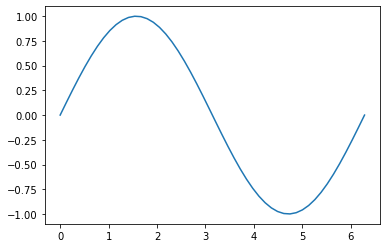

In [2]:
import numpy as np
theta = np.linspace(0,2*np.pi,50) #PI = np.pi
plt.plot(theta,np.sin(theta))
plt.show()

辞書に格納されたデータをプロットすることもできる。その場合はキーを指定し、引数オプション`data`に辞書データを渡す。

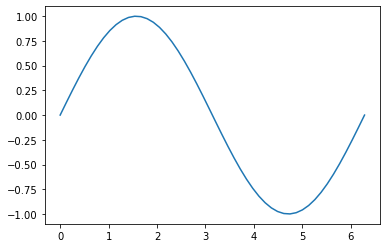

In [3]:
import numpy as np
theta = np.linspace(0,2*np.pi,50) #PI = np.pi
data_dict = {'theta': theta, 'sin': np.sin(theta)}
plt.plot('theta','sin',data=data_dict)
plt.show()

複数のプロットを重ね合わせる場合は、`plot()`を繰り返して、最後に`plt.show()`を行う。

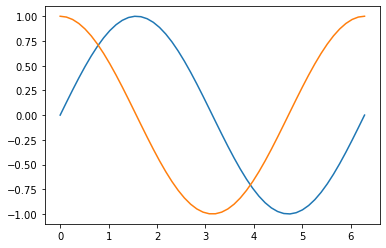

In [4]:
plt.plot(theta,np.sin(theta))
plt.plot(theta,np.cos(theta))
plt.show()

### 軸の設定、装飾
プロットする範囲の指定には、`plt.xlim()`、`plt.ylim()`、`plt.axis()`メソッドを使う。

```python
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axis([xmin, xmax, ymin, ymax])
```


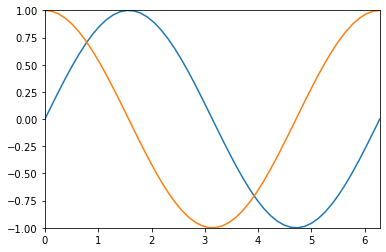

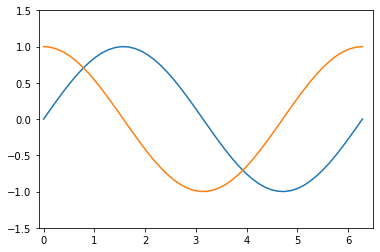

In [5]:
plt.plot(theta,np.sin(theta))
plt.plot(theta,np.cos(theta))
plt.axis([0,2*np.pi,-1,1])
plt.show()
plt.plot(theta,np.sin(theta))
plt.plot(theta,np.cos(theta))
plt.xlim(-0.1,6.5)
plt.ylim(-1.5,1.5)
plt.show()

軸や図のタイトルは`plt.xlabel()`、`plt.ylabel()`、`plt.title()`で指定する。軸には$\TeX$表記方法で数式やギリシャ文字を使うことができる。$\TeX$表記中のバックスラッシュとPythonのエスケープシーケンス（\tや\bなど）を区別するため、raw文字列を指定するrを文字列の前に付け加えるとよい（つけなくても正しく表示される場合が多い）。

```python
plt.xlabel('title', fontsize=フォントサイズ)
```

その他も同様である。また、軸のtickのラベルのサイズは

```python
plt.xticks(fontsize=フォントサイズ)
plt.yticks(fontsize=フォントサイズ)
```

で指定する。

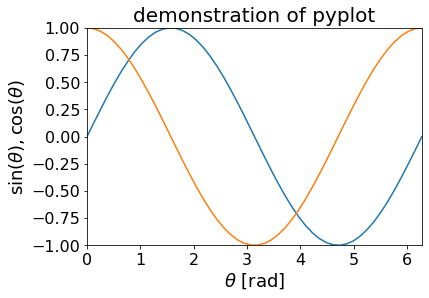

In [6]:
plt.plot(theta,np.sin(theta))
plt.axis([0,2*np.pi,-1,1])
plt.xlabel(r'$\theta$ [rad]',fontsize=18)
plt.ylabel(r'$\sin(\theta), \cos(\theta)$',fontsize=18)
plt.title('demonstration of pyplot',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(theta,np.cos(theta))
plt.show()

### プロットのカスタマイズ
線の種類（シンボル、太さ、色）などを指定するには`plt.plot()`にオプションとして引数を渡す。

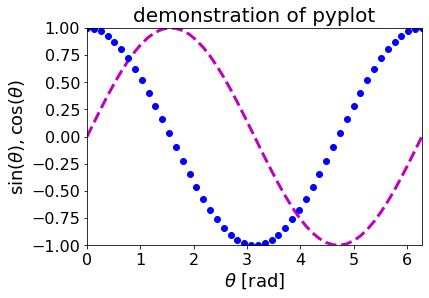

In [7]:
plt.plot(theta,np.sin(theta), 'm--',linewidth=3.0) # magenta-dashed line
plt.axis([0,2*np.pi,-1,1])
plt.xlabel(r'$\theta$ [rad]',fontsize=18)
plt.ylabel(r'$\sin(\theta), \cos(\theta)$',fontsize=18)
plt.title('demonstration of pyplot',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(theta,np.cos(theta), color='blue', linestyle='None', marker='o') #same as 'bo'
plt.show()

### レジェンドの追加
複数のプロットを同時に重ね書きしている場合は、各プロットに対する説明、すなわち、レジェンドを`plt.legend()`で追加する。

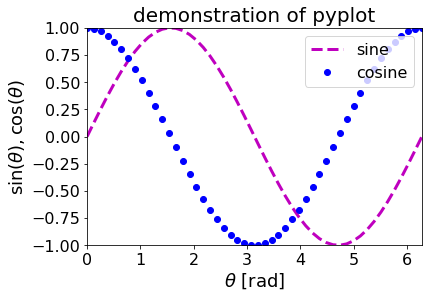

In [8]:
plt.plot(theta,np.sin(theta), 'm--',linewidth=3.0, label='sine') 
plt.axis([0,2*np.pi,-1,1])
plt.xlabel(r'$\theta$ [rad]',fontsize=18)
plt.ylabel(r'$\sin(\theta), \cos(\theta)$',fontsize=18)
plt.title('demonstration of pyplot',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(theta,np.cos(theta), color='blue', linestyle='None', marker='o', label='cosine')
plt.legend(fontsize=16, loc='upper right') #place legend on the upper right corner
plt.show()

### グリッド線の追加
プロットの背景にグリッド線を付けるためには、`plt.grid(True)` をする。

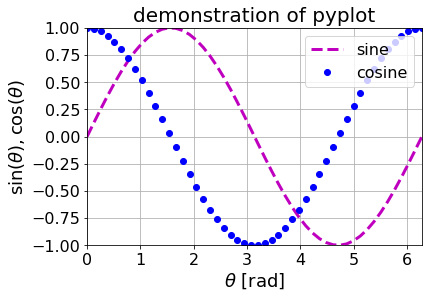

In [9]:
plt.plot(theta,np.sin(theta), 'm--',linewidth=3.0, label='sine') 
plt.axis([0,2*np.pi,-1,1])
plt.xlabel(r'$\theta$ [rad]',fontsize=18)
plt.ylabel(r'$\sin(\theta), \cos(\theta)$',fontsize=18)
plt.title('demonstration of pyplot',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(theta,np.cos(theta), color='blue', linestyle='None', marker='o', label='cosine')
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)
plt.show()

### 複数プロット
１画面に複数のプロットを並べて表示させる場合には、`plt.figure()`と`plt.subplot()`を使う。`plt.figure()`で描画領域の大きさを調整し、`plt.subplot()`で描画位置を指定する。

```python
plt.figure(figsize=(size_of_x_dim, size_of_y_dim)) #specify in inch
```
```python
plt.subplot(nrows, ncols, plot_number)
```

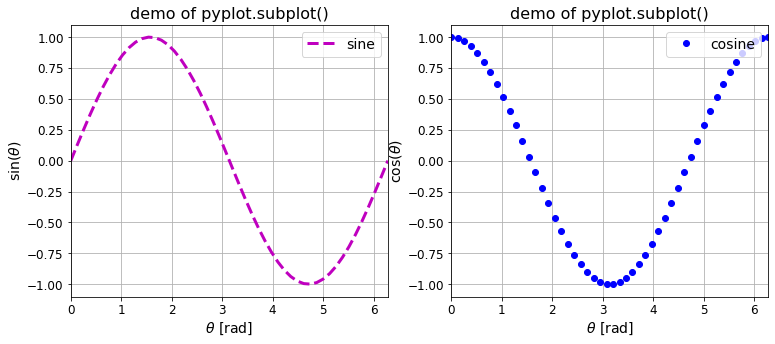

In [10]:
#12.5 x 5 inches figure
plt.figure(figsize=(12.5,5))

#the first place on 1row x 2colums plot
plt.subplot(121)
plt.plot(theta,np.sin(theta), 'm--',linewidth=3.0, label='sine') 
plt.axis([0,2*np.pi,-1.1,1.1])
plt.xlabel(r'$\theta$ [rad]',fontsize=14)
plt.ylabel(r'$\sin(\theta)$',fontsize=14)
plt.title('demo of pyplot.subplot()',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

#the second place on 1row x 2colums plot
plt.subplot(122) 
plt.plot(theta,np.cos(theta), color='blue', linestyle='None', marker='o', label='cosine')
plt.axis([0,2*np.pi,-1.1,1.1])
plt.xlabel(r'$\theta$ [rad]',fontsize=14)
plt.ylabel(r'$\cos(\theta)$',fontsize=14)
plt.title('demo of pyplot.subplot()',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

plt.show()

### テーマの適用
上記のように手動で先の色やグリッド線などを設定することが可能であるが、あらかじめ用意されたテーマを適用して見栄えを良くすることも可能である。

```python
plt.style.use('theme name')
```

テーマの名前は`plt.style.available`で表示できる。また、各テーマについては https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html を参照のこと。

Theme: seaborn


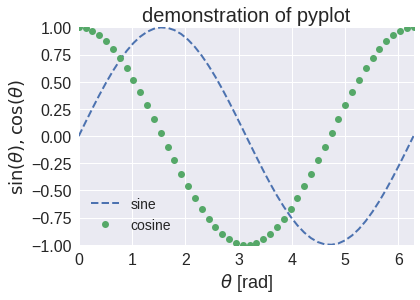


Theme: ggplot


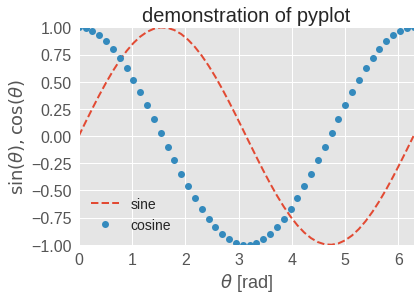

In [11]:
def plt_func():
    plt.figure(figsize=(6,4))
    plt.style.use(theme)
    plt.plot(theta,np.sin(theta),linewidth=2,linestyle='dashed',label='sine') 
    plt.axis([0,2*np.pi,-1,1])
    plt.xlabel(r'$\theta$ [rad]',fontsize=18)
    plt.ylabel(r'$\sin(\theta), \cos(\theta)$',fontsize=18)
    plt.title('demonstration of pyplot',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.plot(theta,np.cos(theta), linestyle='None', marker='o', label='cosine')
    plt.legend(loc='lower left',fontsize=14)

theme = 'seaborn' 
print('Theme:',theme)
plt_func()
plt.show()
print()

theme = 'ggplot' 
print('Theme:',theme)
plt_func()
plt.show()

plt.style.use('default')

### プロットの保存
`plot.show()`で表示した内容を画像などのファイル形式でハードディスクに保存することができる。拡張子（jpg, png, eps, pdf）によって自動的にファイル形式を判定する。

```python
plt.savefig('file name', dpi=DPI) #DPI: dot per inch (e.g., dpi=90)
```

その他のオプションは https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html を参照のこと。

In [12]:
#14 x 6inches figure
plt.figure(figsize=(12.5,5))

#use ggplot theme
theme = 'ggplot' 
plt.style.use(theme)

#the first place on 1row x 2colums plot
plt.subplot(121)
plt.plot(theta,np.sin(theta),'--',linewidth=3.0, label='sine') 
plt.axis([0,2*np.pi,-1.1,1.1])
plt.xlabel(r'$\theta$ [rad]',fontsize=14)
plt.ylabel(r'$\sin(\theta)$',fontsize=14)
plt.title('demo of pyplot.subplot()',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper right')

#the second place on 1row x 2colums plot
plt.subplot(122) 
plt.plot(theta,np.cos(theta), linestyle='None', marker='o', label='cosine')
plt.axis([0,2*np.pi,-1.1,1.1])
plt.xlabel(r'$\theta$ [rad]',fontsize=14)
plt.ylabel(r'$\cos(\theta)$',fontsize=14)
plt.title('demo of pyplot.subplot()',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper right')

#saving the figure to png file with a resolution of 100 DPI
plt.savefig('./pyplot.plot_demo.png',dpi=60) 
#prevent from appearing plot below the present cell
plt.close()

保存した画像ファイルを以下に表示する。
![savefig](./pyplot.plot_demo.png)

## その他のグラフィックス
これまでは、`pyplot.plot()`を例にとって、より見栄え良い図の作り方を紹介した。上記の方法は`pyplot.plot()`に限らず、pyplotをベースとしたその他のグラフィックスに対しても同様である。以下では、`pyplot.plot()`以外の描画方法について、「個人的に」よく使うと思われる機能について紹介する。その他にも、https://matplotlib.org/stable/gallery/index.html に紹介されているような様々な形式の図を作成することができる。

### 散布図
`pyplot.plot()`でも散布図を作ることはできるが、`pyplot.scatter()`では点の大きさをデータの値によって変えるなど、より細かい設定が可能である。

```python
pyplot.scatter(xdata,ydata,s=marker_size, c=maker_color, cmap=color_map)
```

`s`はマーカーの半径（point）、`c`はカラーマップ（`cmap`）に対応した色の値。より詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html を参照のこと。color mapは https://matplotlib.org/stable/tutorials/colors/colormaps.html を参照のこと。

/home/ymatumot/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if sys.path[0] == '':


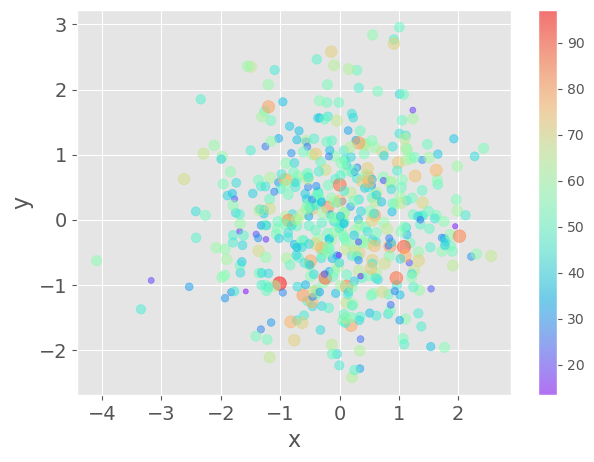

In [13]:
n = 500
x = np.random.normal(0,1.0,n)
y = np.random.normal(0,1.0,n)
val = np.random.normal(50.0,15.0,n)

plt.figure(figsize=(7,5))
plt.scatter(x,y,s=val, c=val,cmap='rainbow',alpha=0.5)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar() #adding corresponding color bar
plt.show()

### ヒストグラム
頻度分布を作成する方法を下に紹介する。

```python
count, loc, patches = plt.hist(data, bins=number_of_bins)
```

さらなる詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html を参照のこと。

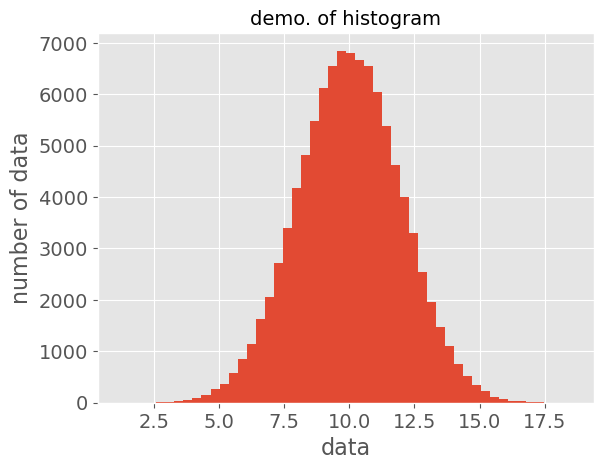

In [14]:
n = 100000
data = np.random.normal(10.0,2.0,n)

#Histogram of a Gaussian distribution
count, loc, patches = plt.hist(data,bins=50)
plt.xlabel('data',fontsize=16)
plt.ylabel('number of data',fontsize=16)
plt.title('demo. of histogram',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 2次元カラーマップ
2次元配列データに対して、それぞれの要素の値に応じて色を付けて表示させる方法をカラーマップ表示という。各配列要素をセルに区切って各セルを色づける方法と、各要素の値を補間して等高線を結びいろづける方法がある。以下ではそれぞれに対応した方法を紹介する。

#### pcolormesh (imshow)
pyplotを通じて表示させる方法として、`pyplot.imshow()`と`pyplot.pcolormesh()`の2つが挙げられる。前者は簡単に表示させるには手軽だが、より汎用的には（例えば、軸データが不均一の場合でも対応できる）後者の`pyplot.pcolormesh()`を使うのが良い。以下ではその使い方の例を紹介する。

```python
plt.pcolormesh(x,y,data)
```

ここで、`x`、`y`はx方向、y方向の軸データの2次元配列である。軸の配列データを作るには`np.meshgrid()`を使うのが良い。例えば、以下のように予め軸データを準備する。

In [15]:
# example of generation of axis 2D data
x, y = np.meshgrid(range(10),range(5))
print('shape of x:',x.shape)
print(x)
print('shape of y:',y.shape)
print(y)      

shape of x: (5, 10)
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
shape of y: (5, 10)
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]]


以上、詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html を参照のこと。

そのまま表示すると、`pyplot.figure()`のサイズに従って表示される。しかし、軸にはしばしば物理的スケールがある場合がある。その場合、軸データの大きさに対応して描画領域のアスペクト比を調整する必要がある。そのためには、`pyplot.axis('scaled')`で設定する （詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib-pyplot-axis ）。

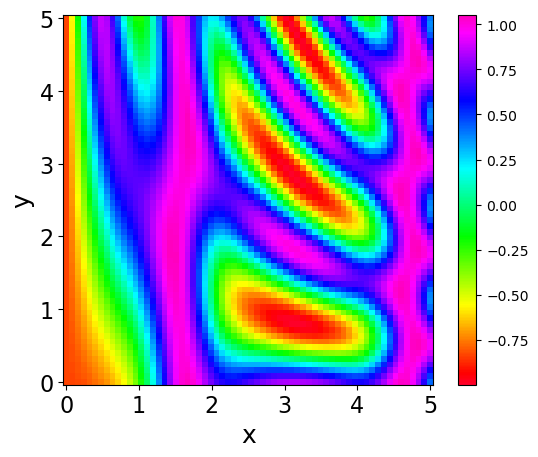

In [16]:
plt.style.use('default') #resetting theme
nx = 64
ny = 64
x = np.linspace(0,5,nx)
y = np.linspace(0,5,ny)
X, Y = np.meshgrid(x, y)
z = np.sin(X)**10 + np.cos(10 + Y*X) * np.cos(X)

plt.pcolormesh(X,Y,z,cmap='gist_rainbow')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis('scaled')
plt.colorbar()
plt.show()

### 等高線
配列データに対して等高線を結んで表示する方法を以下では紹介する。

#### contour

```python
plt.contour(x,y,data,numer_of_contour_levels)
```

`pyplot.contour()`と`pyplot.contourf()`の２つがあり、等高線のみを表示させる場合は前者を使う。

軸データは`pyplot.pcolormesh()`と違い、１次元データでもよい。その他のオプションはほとんどと同様である。`number_of_contour_levels`には等高線の数を指定するか、等高線を引く各レベルの値を格納したリストを渡す。`pyplot.contour(f)()`の場合は図のアスペクト比を調整する必要はない。詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html を参照のこと。

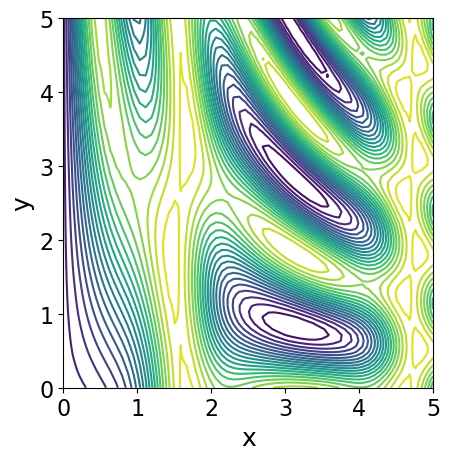

In [17]:
plt.style.use('default') #resetting theme
nx = 64
ny = 64
x = np.linspace(0,5,nx)
y = np.linspace(0,5,ny)
X, Y = np.meshgrid(x, y)
z = np.sin(X)**10 + np.cos(10 + Y*X) * np.cos(X)

plt.contour(x,y,z,20) #input axis data are 1D
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis('scaled')
plt.show()

### ベクトル場の表示
ベクトル場（向きを持つ物理量）を表示させたい場合は、各配列要素でのベクトル場の向きを矢印で表す方法（`pyplot.quiver()`）と、等高線と同じく、各要素の値を補間して流線を描く`pyplot.streamplot()`の方法をそれぞれ以下に紹介する。

#### 矢印による表現 (quiver）
ベクトル場を、ベクトルの大きさのカラーマップの上に表示させる方法を紹介する。

```python
plt.quiver(x, y, ux, uy)
```

軸データは`pyplot.contourf()`と同じく１次元データでもよい。`ux`、`uy`はベクトル要素の２次元配列データである。詳しくは https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html を参照のこと。

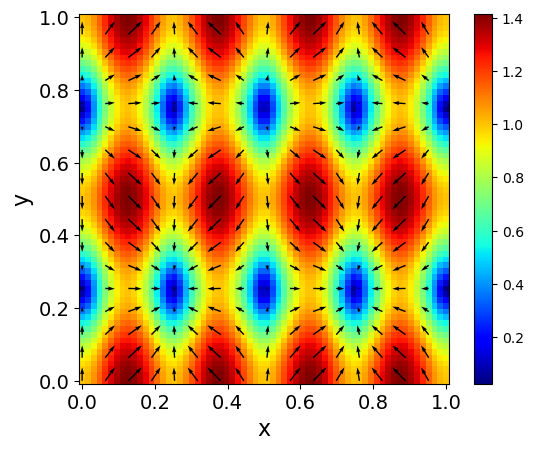

In [18]:
nx = 64
ny = 64
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
X, Y = np.meshgrid(x, y)
ux = np.sin(2*2*np.pi*X)
uy = np.cos(1*2*np.pi*Y)
u = np.sqrt(ux**2+uy**2)
plt.pcolormesh(X,Y,u,cmap='jet')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('scaled')
plt.colorbar()
# adding arrows of vector fields
# data is sampled every 4 elements
plt.quiver(x[::4],y[::4],ux[::4,::4],uy[::4,::4])
plt.show()

#### 流線による表現（streamplot）
矢印だとうまく表現できない場合もある。その場合は流線を描く方法がある。

```python
plt.streamplot(x, y, ux, uy)
```

詳細は https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html を参照のこと。

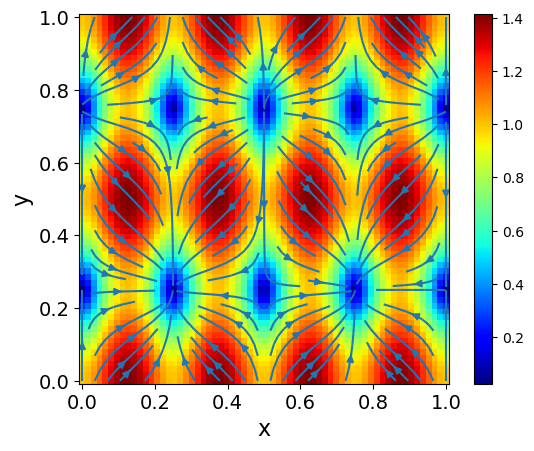

In [19]:
nx = 64
ny = 64
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
X, Y = np.meshgrid(x, y)
ux = np.sin(2*2*np.pi*X)
uy = np.cos(1*2*np.pi*Y)
u = np.sqrt(ux**2+uy**2)
plt.pcolormesh(X,Y,u,cmap='jet')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('scaled')
plt.colorbar()
# adding arrows of vector fields
# data is sampled every 4 elements
plt.streamplot(x,y,ux,uy)
plt.show()

## 演習課題
前回のNumPyを使った円周率の演習問題をmatplotlibを使って図示するプログラムを作成しよう。正方形の中に点を打ち、半径$r$に対して$0\le r \le1$の点とそれ以外の点を色分けしてプロットする。軸を装飾するなど、見栄え良く図を作成しよう。

![](./img/mc_pi.png)
